## Teste Z
Máquina fabrica perfumes com média μ = 150 ml e desvio padrão 𝜎 = 2 ml. Uma amostra aleatória de 100 frascos de perfume é colhida e observa-se uma média de 150,2 ml. A máquina está operando corretamente (confiança = 95%)?

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats import weightstats

In [15]:
df = pd.read_csv('Machine1.csv')
df.head(15)

,Machine 1
0,152.63
1,152.94
2,151.29
3,153.44
4,148.58
5,151.29
6,150.84
7,154.55
8,154.21
9,146.95


In [16]:
df.describe()

,Machine 1
count,100.000000
mean,150.203100
std,2.018812
min,145.550000
25%,148.717500
50%,150.285000
75%,151.502500
max,154.550000


Vamos agora plotar a distribuição desses dados usando displot.

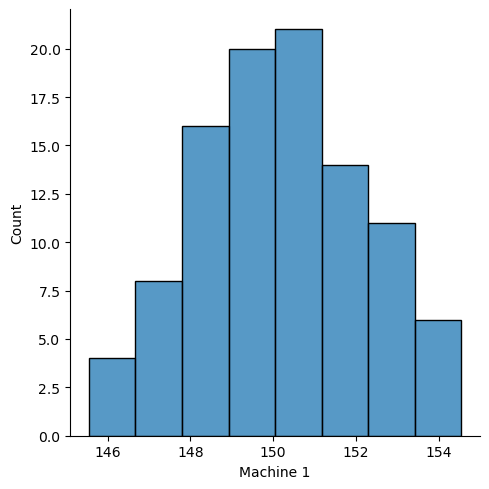

In [17]:
sns.displot(data=df, x='Machine 1')

Vamos plotar um boxplot dos nossos dados.

<Axes: >

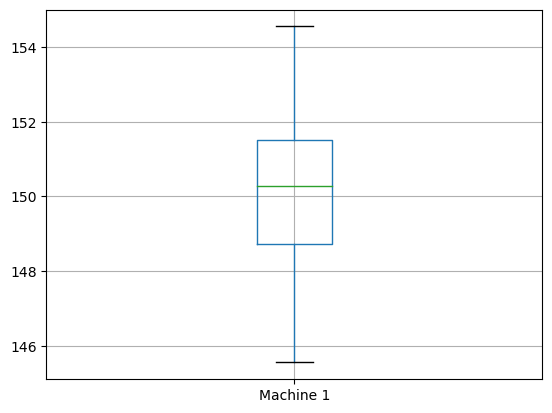

In [18]:
df.boxplot(column='Machine 1')

Para realizar nosso teste de hipótese (Teste Z) vamos usar weightstats.

value é a media nesse parametro\
alternative= pra que lado vc quer fazer o teste\
o primeiro valor é o z calculado, o segundo valor da resposta é o pvalue e vc compara com o alpha\
SO USAMOS O SEGUNDO VALOR QUE É O PVALUE

In [19]:
weightstats.ztest(x1=df['Machine 1'], value=150, alternative='two-sided')

(1.0060370247722599, 0.3143977600779597)

## Teste t
Máquina fabrica perfumes com média μ = 150 ml. Uma amostra aleatória de 4 frascos de perfume é colhida e observa-se uma média de 151 ml e um desvio padrão amostral s = 2 ml. A máquina está operando corretamente (confiança = 95%)?

Voce calcula o df(degree of fredom) = n(numero de amostras) -1\
o alpha se for duas caldas vc tem que dividr\
Na tabela o alpha é o horizontal o df é o vertical


Vamos começar gerando as 4 amostras.

In [20]:
volume= pd.Series([148.5, 153.4, 150.9, 151.2])

In [21]:
volume.describe()

count      4.000000
mean     151.000000
std        2.004994
min      148.500000
25%      150.300000
50%      151.050000
75%      151.750000
max      153.400000
dtype: float64

Vamos agora realizar o Teste t.

parametros = amostra e media\
resultado = zcalc, pvalue e df\
se o p value for maior que o alpha a hipotese nula é certa, se tiver duas caudas vc precisa dividir o alpha

In [22]:
stats.ttest_1samp(volume, 150)

TtestResult(statistic=0.997509336107632, pvalue=0.3920333832606524, df=3)

Exercício 1
Suponha que uma máquina envase garrafas de vinho com média 750 ml e desvio padrão desconhecido. A vinícola decidiu realizar um teste de hipótese com erro alfa = 0,05 e duas caudas. Para tanto, escolheu 4 amostras do arquivo Machine2.csv. Realize o teste t e informe se a máquina está operando corretamente (hipótese nula).

In [23]:
df= pd.read_csv('Machine2.csv')
df4 = df.tail(4)
df4


,Machine 2
46,752.93
47,757.18
48,753.72
49,760.44


In [24]:
df4.describe()

,Machine 2
count,4.000000
mean,756.067500
std,3.450173
min,752.930000
25%,753.522500
50%,755.450000
75%,757.995000
max,760.440000


In [25]:
stats.ttest_1samp(df4, 750)

TtestResult(statistic=array([3.51721524]), pvalue=array([0.03899514]), df=array([3]))

Suponha que o desvio padrão da máquina seja conhecido (15 ml). Realize um teste Z com as 50 amostras disponíveis no arquivo 'machine2.csv'.

In [26]:
weightstats.ztest(x1=df['Machine 2'], value=750, alternative='two-sided')

(0.9804661150943946, 0.32685608794791343)